In [73]:
#Load Libraries
import pandas as pd
import numpy as np

In [74]:
#load_data
snf_data = pd.read_excel(r'Data/SNFs.xlsx')
episode_data = pd.read_excel(r'Data/Episodes.xlsx')

In [75]:
snf_data

,ProviderName,PID,ProviderPracticeAddress1,ProviderPracticeAddress2,ProviderPracticeCity,ProviderPracticeStateCode,ProviderPracticeZipCode,County
0,648 Medical Squadron,1,8006 CHENNAULT RD,STE 1,BROOKS CITY BASE,TX,78235,Bexar
1,Abilene Nursing and Rehabilitation Center,2,2630 OLD ANSON RD,NaN,ABILENE,TX,79603,Taylor
2,Abilene Regional Medical Center,3,6250 US HIGHWAY 83,NaN,ABILENE,TX,79606,Taylor
3,Abilene Regional Medical Center Skilled Nursin...,4,6250 HIGHWAY 83 84 AT ANTILLEY RD,NaN,ABILENE,TX,79606,Taylor
4,"Absolutely Angels, Inc",5,936 E PRODUCTION DR,NaN,PILOT POINT,TX,76258,Denton
...,...,...,...,...,...,...,...,...
1808,Wortham Rehabilitation Center,1809,117 TWIN CIR,NaN,WORTHAM,TX,76693,Freestone
1809,Yoakum Community Hospital Swing Bed,1810,1200 CARL RAMERT DR,NaN,YOAKUM,TX,77995,Lavaca
1810,Yoakum County Hospital,1811,412 MUSTANG DR,NaN,DENVER CITY,TX,79323,Yoakum
1811,Yoakum Nursing and Rehabilitation Center,1812,1300 CARL RAMERT DR,NaN,YOAKUM,TX,77995,Lavaca


In [76]:
episode_data

,PID,EpisodeID,ContractType,AdmitDate,DischargeDate
0,530,1,CT1,12/1/2019,2020-01-30
1,1107,2,CT1,12/1/2019,NaT
2,1107,3,CT2,12/1/2019,2019-12-07
3,1107,4,CT2,12/1/2019,2019-12-02
4,1249,5,CT1,12/1/2019,NaT
...,...,...,...,...,...
40993,1771,56813,CT1,1/1/2019,2019-01-15
40994,1177,56814,CT1,1/1/2019,2019-01-14
40995,1187,56815,CT1,1/1/2019,2019-02-07
40996,1771,56816,CT1,1/1/2019,2019-01-18


In [77]:
#Certain patients did not have a discharge date. Those patient records were dropped
episode_data = episode_data.dropna()

In [78]:
#join SNF data with patients data. We dropped any SNFs that do not have patient records 
snf_patient_data = snf_data.merge(episode_data, on = 'PID')

In [79]:
snf_patient_data

,ProviderName,PID,ProviderPracticeAddress1,ProviderPracticeAddress2,ProviderPracticeCity,ProviderPracticeStateCode,ProviderPracticeZipCode,County,EpisodeID,ContractType,AdmitDate,DischargeDate
0,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,238,CT2,12/1/2019,2019-12-09
1,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,2175,CT2,11/1/2019,2019-11-06
2,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,5876,CT2,8/1/2019,2019-08-18
3,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,10768,CT2,5/1/2019,2019-05-07
4,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,11305,CT2,5/1/2019,2019-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...
39844,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,35569,CT2,12/1/2019,2019-12-18
39845,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,35574,CT2,12/1/2019,2019-12-08
39846,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,36778,CT2,11/1/2019,2019-11-20
39847,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,43048,CT2,6/1/2019,2019-06-19


In [80]:
ct_sizes = snf_patient_data.groupby(['PID','ContractType']).size()
pd.DataFrame(ct_sizes)

0
PID  ContractType    
6    CT1            1
     CT2           65
8    CT1           25
     CT2           82
9    CT1           61
...                ..
1808 CT2           42
1810 CT2            2
1811 CT2            6
1812 CT2            5
1813 CT2            5

[1933 rows x 1 columns]

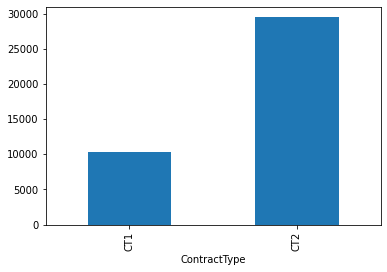

In [81]:
snf_patient_data.groupby(['ContractType']).size().plot.bar();

In [82]:
#Convert admit date and discharge date columns to a datetime format
snf_patient_data['AdmitDate'] = pd.to_datetime(snf_patient_data['AdmitDate'])
snf_patient_data['DischargeDate'] = pd.to_datetime(snf_patient_data['DischargeDate'])

In [83]:
#Calculate the length of stay of the patient 
snf_patient_data['LengthOfStay'] = snf_patient_data['DischargeDate'] - snf_patient_data['AdmitDate']

In [84]:
snf_patient_data.groupby(['LengthOfStay']).size()

LengthOfStay
-61 days      1
-4 days       1
-1 days       2
0 days      463
1 days      696
           ... 
455 days      1
460 days      1
464 days      1
500 days      1
504 days      1
Length: 272, dtype: int64

In [85]:
snf_patient_data = snf_patient_data[snf_patient_data['LengthOfStay'].dt.days >= 0]

In [87]:
snf_patient_data.groupby()

,ProviderName,PID,ProviderPracticeAddress1,ProviderPracticeAddress2,ProviderPracticeCity,ProviderPracticeStateCode,ProviderPracticeZipCode,County,EpisodeID,ContractType,AdmitDate,DischargeDate,LengthOfStay
0,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,238,CT2,2019-12-01,2019-12-09,8 days
1,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,2175,CT2,2019-11-01,2019-11-06,5 days
2,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,5876,CT2,2019-08-01,2019-08-18,17 days
3,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,10768,CT2,2019-05-01,2019-05-07,6 days
4,Accel at College Station,6,1500 MEDICAL AVE,NaN,COLLEGE STATION,TX,77845,NaN,11305,CT2,2019-05-01,2019-05-15,14 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39844,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,35569,CT2,2019-12-01,2019-12-18,17 days
39845,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,35574,CT2,2019-12-01,2019-12-08,7 days
39846,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,36778,CT2,2019-11-01,2019-11-20,19 days
39847,Yorktown Nursing and Rehabilitation Center,1813,670 W 4TH ST,NaN,YORKTOWN,TX,78164,DeWitt,43048,CT2,2019-06-01,2019-06-19,18 days


In [96]:
snf_patient_data['days'] = snf_patient_data['LengthOfStay'].dt.days.astype('int')

<ipython-input-96-92d700f28f21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snf_patient_data['days'] = snf_patient_data['LengthOfStay'].dt.days.astype('int')


In [98]:
snf_patient_data.days

0         8
1         5
2        17
3         6
4        14
         ..
39844    17
39845     7
39846    19
39847    18
39848    17
Name: days, Length: 39845, dtype: int64

In [101]:
snf_patient_data.groupby(['ContractType'])['days'].mean()

ContractType
CT1    34.382155
CT2    16.397020
Name: days, dtype: float64